<a href="https://colab.research.google.com/github/CaioAndersonMM/Rede_Neural_ML_Sistemas_Embarcados/blob/main/Sistemas_Embarcados_Caio_Artur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   **Caio Anderson Martins Moura**
*  **Artur Segantini Guedes**


# Primeira Rede Neural TensorFlow (TF)

## Importando as bibliotecas

In [1]:
import tensorflow as tf
import numpy as np

print(tf.version.VERSION)

2.15.0


## Conjunto de dados (Dataset)

In [2]:
# Define alguns dados para treino (xs como entradas e ys como saídas)

xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [3]:
#o tipo "list" fornece um parâmetro "shape" com o formato da lista, ou seja, quais dimensões
print(xs, xs.shape)
print(ys, ys.shape)

[-1.  0.  1.  2.  3.  4.] (6,)
[-3. -1.  1.  3.  5.  7.] (6,)


## Definindo o Modelo (Arquitetura NN)

In [4]:
# Define uma rede neuraral (NN) com 1 neurônio
# Para maior informações sobre funções TF: https://www.tensorflow.org/api_docs

A1M1 = tf.keras.Sequential(
          [tf.keras.layers.Dense( units=1, input_shape=[1])]
    )

A1M2 = tf.keras.Sequential(
          [tf.keras.layers.Dense( units=1, input_shape=[1])]
    )

A1M3 = tf.keras.Sequential(
          [tf.keras.layers.Dense( units=1, input_shape=[1])]
    )

models = [A1M1, A1M2, A1M3]


In [5]:
#mostra um resumo de todas as camadas e parâmetros da NN
models[0].summary()
print()
print()
print()
models[1].summary()
print()
print()
print()
models[2].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



Model: "sequential_2"
_________________________________________________________________
 Layer (type

**Inicialização dos parâmetros padrão**
- kernel_initializer ('ws') => 'glorot_uniform' (Xavier)
- bias_initializer  ('bs') => 'zeros'

-> O objetivo da Xavier Initialization é inicializar os pesos de forma que a variação das ativações seja a mesma em todas as camadas. Essa variação constante ajuda a evitar que o gradiente exploda ou desapareça.

**Visualizando pesos iniciais (parâmetros)**

In [7]:
models[0].get_weights() # lista de parâmetros
models[1].get_weights() # lista de parâmetros
models[2].get_weights() # lista de parâmetros

[array([[-0.49491394]], dtype=float32), array([0.], dtype=float32)]

In [10]:
print("wi = ", A1M1.get_weights()[0][0][0])
print("b  = ", A1M1.get_weights()[1][0])

print("wi = ", A1M2.get_weights()[0][0][0])
print("b  = ", A1M2.get_weights()[1][0])


print("wi = ", A1M3.get_weights()[0][0][0])
print("b  = ", A1M3.get_weights()[1][0])

wi =  1.5221423
b  =  0.0
wi =  -0.47963095
b  =  0.0
wi =  -0.49491394
b  =  0.0


## Compilando o Modelo

In [12]:
# Use stochastic gradient descent (SGD) para otimização e
# o erro quadrático médio como função de perda

A1M1.compile(optimizer='sgd', loss='mean_squared_error')
A1M2.compile(optimizer='sgd', loss='mean_squared_error')
A1M3.compile(optimizer='sgd', loss='mean_squared_error')

In [13]:
A1M1.save('primeiro_modelo_nao_treinado.h5')
A1M2.save('segundo_modelo_nao_treinado.h5')
A1M3.save('terceiro_modelo_nao_treinado.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
print(A1M1.predict([10.0]))
print(A1M2.predict([10.0]))
print(A1M3.predict([10.0]))

1/1 [==============================] - 0s 104ms/step
[[15.221423]]
1/1 [==============================] - 0s 67ms/step
[[-4.7963095]]
1/1 [==============================] - 0s 72ms/step
[[-4.9491396]]


Inspecionando o Modelo com [Netron](https://netron.app)

In [16]:
#instalando Netron para executar dentro do colab
!pip install -q netron

In [ ]:
#visualizar usando Netron
import netron
import portpicker
from google.colab import output

port = portpicker.pick_unused_port()

# Read the model file and start the netron browser.
with output.temporary():
  netron.start('primeiro_modelo_nao_treinado.h5', port, browse=False)
  netron.start('segundo_modelo_nao_treinado.h5', port, browse=False)
  netron.start('terceiro_modelo_nao_treinado.h5', port, browse=False)

output.serve_kernel_port_as_iframe(port, height='800')

## Treinamento

In [17]:
#Utilizar vetores separados facilitar o trabalho do PLOT - ACREDITE ARTUR!
weights_A1M1 = []
weights_A1M2 = []
weights_A1M3 = []


for i, model in enumerate(models, start=1):
    # PERCORRO models para 100, 300 e 500 épocas
    for epochs in [100, 300, 500]:
        model.fit(xs, ys, epochs=epochs) #           QUAL DATASET USADO EM AULA ???????????????????/

        # Salva os pesos após o treinamento
        weights = model.get_weights()
        if i == 1:
            weights_A1M1.append(weights)
        elif i == 2:
            weights_A1M2.append(weights)
        elif i == 3:
            weights_A1M3.append(weights)

        np.savez(f'Model_A1M{i}_E{epochs}.npz', weights=weights)
        print(f'Model A1M{i} trained for {epochs} epochs, weights saved')



Epoch 1/100
1/1 [==============================] - 0s 335ms/step - loss: 0.7462
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 0.7071
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 0.6739
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 0.6453
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 0.6205
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 0.5986
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 0.5791
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.5616
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 0.5456
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 0.5309
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 0.5173
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 0.5045
Epoch 13/100
1/1 [==============================] - 0s 8ms

/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py:716: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


A saída de streaming foi truncada nas últimas 5000 linhas.
Epoch 105/300
1/1 [==============================] - 0s 7ms/step - loss: 0.0090
Epoch 106/300
1/1 [==============================] - 0s 7ms/step - loss: 0.0088
Epoch 107/300
1/1 [==============================] - 0s 13ms/step - loss: 0.0087
Epoch 108/300
1/1 [==============================] - 0s 11ms/step - loss: 0.0085
Epoch 109/300
1/1 [==============================] - 0s 16ms/step - loss: 0.0083
Epoch 110/300
1/1 [==============================] - 0s 12ms/step - loss: 0.0081
Epoch 111/300
1/1 [==============================] - 0s 7ms/step - loss: 0.0080
Epoch 112/300
1/1 [==============================] - 0s 10ms/step - loss: 0.0078
Epoch 113/300
1/1 [==============================] - 0s 12ms/step - loss: 0.0076
Epoch 114/300
1/1 [==============================] - 0s 14ms/step - loss: 0.0075
Epoch 115/300
1/1 [==============================] - 0s 6ms/step - loss: 0.0073
Epoch 116/300
1/1 [==============================] - 0

Inspecionando o Modelo

In [18]:
for i, weights in enumerate([weights_A1M1, weights_A1M2, weights_A1M3], start=1):
    final_weights = weights[-1]  # Pega os pesos após o treinamento completo
    print(f'Pesos finais do modelo A1M{i}:')
    print("wi = ", final_weights[0][0])
    print("b  = ", final_weights[1][0])

Pesos finais do modelo A1M1:
wi =  [1.9999704]
b  =  -0.99990785
Pesos finais do modelo A1M2:
wi =  [1.9999535]
b  =  -0.9998566
Pesos finais do modelo A1M3:
wi =  [1.9999534]
b  =  -0.99985605


In [19]:
# Salvando o Modelos treinados
A1M1.save('meu_primeiro_modelo_treinado.h5')
A1M2.save('meu_segundo_modelo_treinado.h5')
A1M3.save('meu_terceiro_modelo_treinado.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#visualizando o modelo treinado no netron
port = portpicker.pick_unused_port()

# Read the model file and start the netron browser.
with output.temporary():
  netron.start('meu_primeiro_modelo_treinado.h5', port, browse=False)
  netron.start('meu_segundo_modelo_treinado.h5', port, browse=False)
  netron.start('meu_terceiro_modelo_treinado.h5', port, browse=False)


output.serve_kernel_port_as_iframe(port, height='800')

## Testando o Modelo

In [ ]:
# history.history.keys() #eu não defini isso no treinamento

<ipython-input-27-9bef2e920be3>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  weights_A1M1 = np.array(weights_A1M1)
<ipython-input-27-9bef2e920be3>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  weights_A1M2 = np.array(weights_A1M2)
<ipython-input-27-9bef2e920be3>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  weights_A1M3 = 

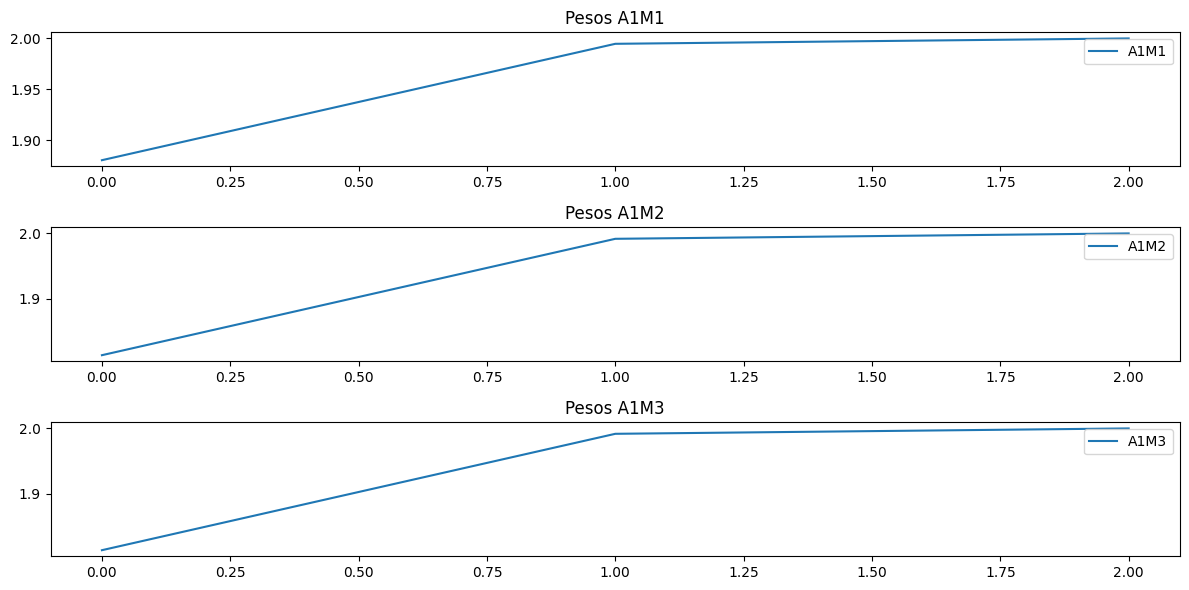

In [27]:
import matplotlib.pyplot as plt

weights_A1M1 = np.array(weights_A1M1)
weights_A1M2 = np.array(weights_A1M2)
weights_A1M3 = np.array(weights_A1M3)


# Plota os valores dos pesos
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(weights_A1M1[:, 0], label='A1M1')
plt.title('Pesos A1M1')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(weights_A1M2[:, 0], label='A1M2')
plt.title('Pesos A1M2')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(weights_A1M3[:, 0], label='A1M3')
plt.title('Pesos A1M3')
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
# Predizer a saída de um novo dado (Inferência)

print(A1M1.predict([10.0]))
print(A1M2.predict([10.0]))
print(A1M3.predict([10.0]))

1/1 [==============================] - 0s 49ms/step
[[18.999796]]
1/1 [==============================] - 0s 53ms/step
[[18.999678]]
1/1 [==============================] - 0s 51ms/step
[[18.999678]]


1/1 [==============================] - 0s 21ms/step


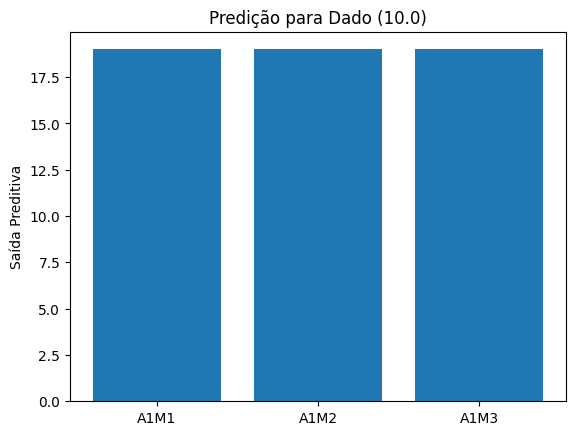

In [29]:
# PLOTAGEM DA PREDIÇÃO

dado = np.array([10.0], dtype=float)

predictions = [model.predict(dado) for model in models]

# Plota os valores preditos
plt.bar(range(1, 4), [prediction[0][0] for prediction in predictions], tick_label=['A1M1', 'A1M2', 'A1M3'])
plt.title('Predição para Dado (10.0)')
plt.ylabel('Saída Preditiva')
plt.show()